In [41]:
from glob import glob

files = glob('train_step*_bsm1/cv_results.hd5')

df = pd.concat(list(map(pd.read_hdf,files)))

In [42]:
df.columns

Index([u'mean_fit_time', u'mean_score_time', u'mean_test_score',
       u'mean_train_score', u'param_learning_rate', u'param_max_depth',
       u'param_n_estimators', u'param_reg_lambda', u'param_subsample',
       u'params', u'rank_test_score', u'split0_test_score',
       u'split0_train_score', u'split1_test_score', u'split1_train_score',
       u'split2_test_score', u'split2_train_score', u'split3_test_score',
       u'split3_train_score', u'split4_test_score', u'split4_train_score',
       u'std_fit_time', u'std_score_time', u'std_test_score',
       u'std_train_score'],
      dtype='object')

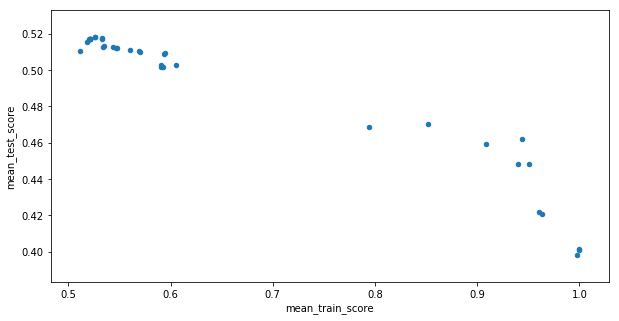

In [43]:
df.plot.scatter('mean_train_score','mean_test_score')
# df.plot.scatter('rank_test_score','mean_test_score')

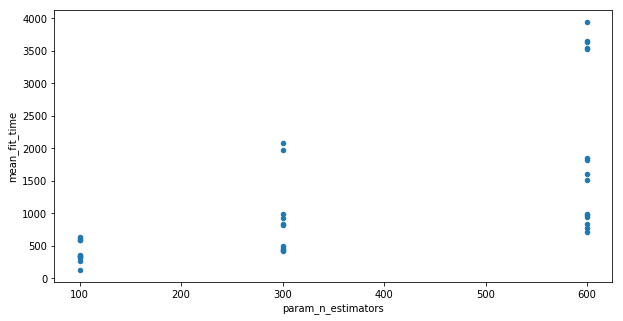

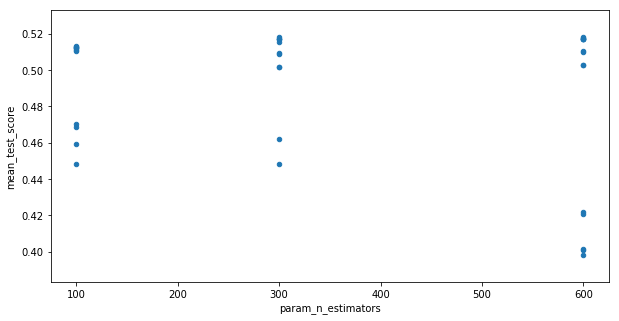

In [44]:
df.plot.scatter('param_n_estimators','mean_fit_time')
df.plot.scatter('param_n_estimators','mean_test_score')

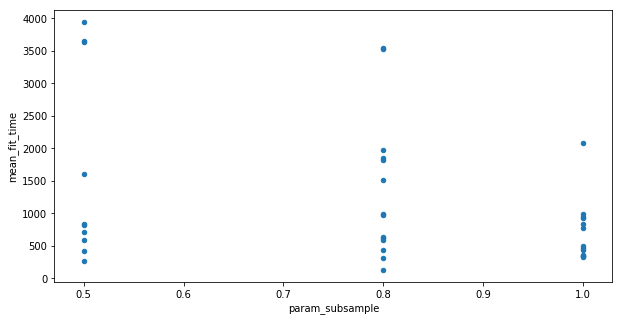

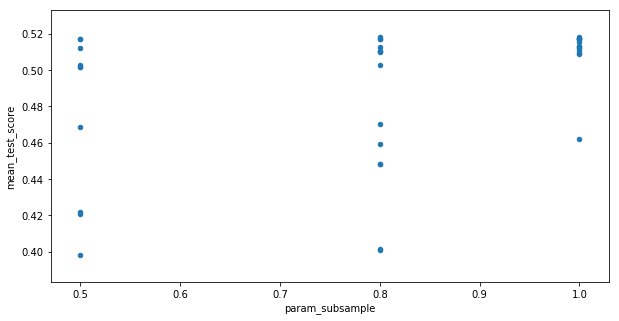

In [45]:
df.plot.scatter('param_subsample','mean_fit_time')
df.plot.scatter('param_subsample','mean_test_score')

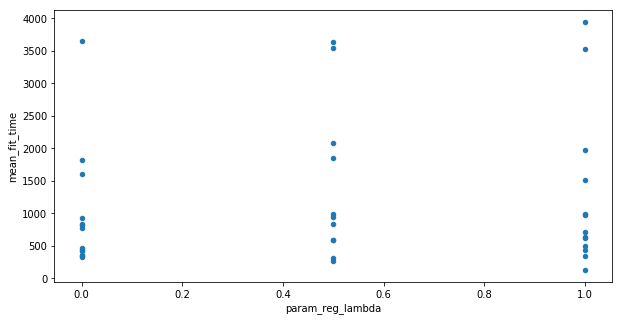

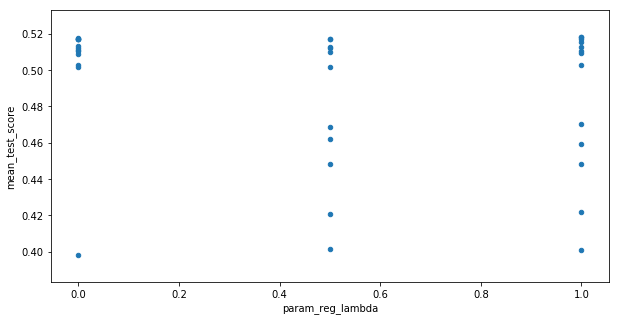

In [46]:
df.plot.scatter('param_reg_lambda','mean_fit_time')
df.plot.scatter('param_reg_lambda','mean_test_score')

In [49]:
df.mean_test_score.argmax()

1

In [55]:
df.loc[1,['params']]

,params
1,"{u'n_estimators': 600, u'subsample': 1.0, u're..."
1,"{u'n_estimators': 100, u'subsample': 1.0, u're..."
1,"{u'n_estimators': 300, u'subsample': 1.0, u're..."


In [51]:
df.mean_test_score.max()

0.5178809305529527

In [58]:
df[ ['mean_test_score','std_test_score'] ]

,mean_test_score,std_test_score
0,0.502711,0.000982
1,0.517791,0.001238
0,0.516941,0.001125
1,0.510799,0.001288
2,0.516934,0.001322
3,0.512290,0.001209
4,0.421730,0.000797
5,0.502792,0.001234
6,0.448354,0.001957
7,0.459320,0.001651


In [71]:
dfgood = df[ np.abs(df.mean_test_score - df.mean_test_score.max())/df.std_test_score < 2 ]

In [72]:
dfgood.mean_fit_time.argmin()

2

In [73]:
dfgood.loc[2]

mean_fit_time                                                    415.534
mean_score_time                                                  10.3488
mean_test_score                                                 0.516934
mean_train_score                                                0.520664
param_learning_rate                                                 0.05
param_max_depth                                                        5
param_n_estimators                                                   300
param_reg_lambda                                                       0
param_subsample                                                      0.5
params                 {u'n_estimators': 300, u'subsample': 0.5, u're...
rank_test_score                                                        6
split0_test_score                                               0.516607
split0_train_score                                              0.520773
split1_test_score                                  

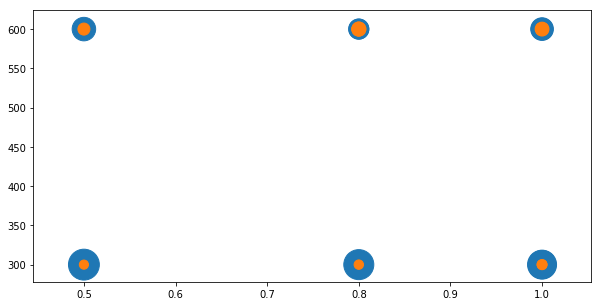

In [87]:
plt.scatter(dfgood.param_subsample, dfgood.param_n_estimators, s=dfgood.mean_fit_time.max() / dfgood.mean_fit_time  * 400. )
plt.scatter(dfgood.param_subsample, dfgood.param_n_estimators, s=dfgood.mean_test_score  / dfgood.mean_test_score.max() / (dfgood.mean_fit_time.max() / dfgood.mean_fit_time) * 200. )

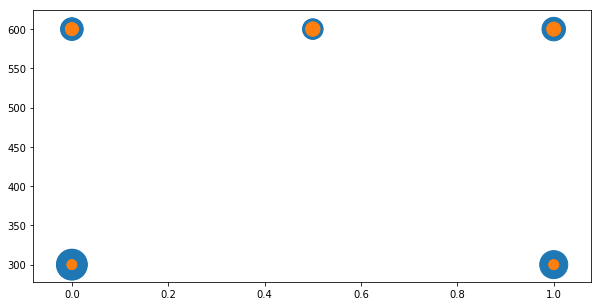

In [88]:
plt.scatter(dfgood.param_reg_lambda, dfgood.param_n_estimators, s=dfgood.mean_fit_time.max() / dfgood.mean_fit_time  * 400. )
plt.scatter(dfgood.param_reg_lambda, dfgood.param_n_estimators, s=dfgood.mean_test_score  / dfgood.mean_test_score.max() / (dfgood.mean_fit_time.max() / dfgood.mean_fit_time) * 200. )

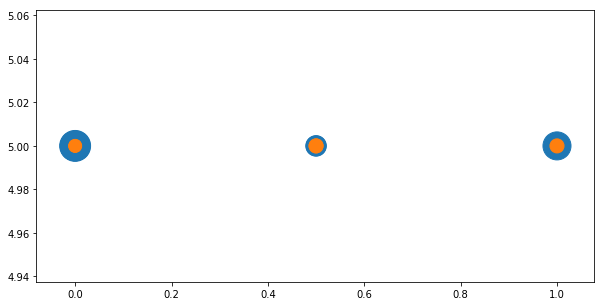

In [90]:
plt.scatter(dfgood.param_reg_lambda, dfgood.param_max_depth, s=dfgood.mean_fit_time.max() / dfgood.mean_fit_time  * 400. )
plt.scatter(dfgood.param_reg_lambda, dfgood.param_max_depth, s=dfgood.mean_test_score  / dfgood.mean_test_score.max() / (dfgood.mean_fit_time.max() / dfgood.mean_fit_time) * 200. )

In [89]:
dfgood[ dfgood.param_subsample == 0.8 ]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators,param_reg_lambda,param_subsample,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
18,439.723856,10.162772,0.516893,0.521421,0.05,5,300,0,0.8,"{u'n_estimators': 300, u'subsample': 0.8, u're...",...,0.516389,0.521174,0.518719,0.521265,0.515066,0.521831,58.763874,1.874831,0.001194,0.000281
20,978.606509,23.074048,0.517851,0.526238,0.05,5,600,1,0.8,"{u'n_estimators': 600, u'subsample': 0.8, u're...",...,0.518079,0.526103,0.519466,0.525935,0.516281,0.526654,61.009960,5.431491,0.001017,0.000254
27,989.853641,21.263804,0.516905,0.532635,0.1,5,600,0.5,0.8,"{u'n_estimators': 600, u'subsample': 0.8, u're...",...,0.517307,0.532735,0.518389,0.532251,0.514679,0.533093,93.799184,3.187740,0.001277,0.000309


In [92]:
dfgood.loc[20]['params']

{'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 600,
 'reg_lambda': 1.0,
 'subsample': 0.8}